## 1. Setup and Initialization

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import os
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("Libraries loaded successfully")
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Libraries loaded successfully
Analysis Date: 2026-01-02 09:01:21


In [2]:
# Define data paths
BASE_PATH = r'../data/raw/building-data-genome-project-2/data'
METADATA_PATH = os.path.join(BASE_PATH, 'metadata/metadata.csv')
WEATHER_PATH = os.path.join(BASE_PATH, 'weather/weather.csv')
METERS_PATH = os.path.join(BASE_PATH, 'meters/raw')

# Verify paths exist
print("Checking data paths...")
print(f"Base path exists: {os.path.exists(BASE_PATH)}")
print(f"Metadata exists: {os.path.exists(METADATA_PATH)}")
print(f"Weather exists: {os.path.exists(WEATHER_PATH)}")
print(f"Meters path exists: {os.path.exists(METERS_PATH)}")

Checking data paths...
Base path exists: True
Metadata exists: True
Weather exists: True
Meters path exists: True


## 2. Building Metadata Analysis

In [3]:
# Load metadata
print("=" * 70)
print("LOADING BUILDING METADATA")
print("=" * 70)

metadata = pd.read_csv(METADATA_PATH)

print(f"\nMetadata loaded: {metadata.shape[0]} buildings, {metadata.shape[1]} features")
print(f"\nColumns: {list(metadata.columns)}")
metadata.head(10)

LOADING BUILDING METADATA

Metadata loaded: 1636 buildings, 32 features

Columns: ['building_id', 'site_id', 'building_id_kaggle', 'site_id_kaggle', 'primaryspaceusage', 'sub_primaryspaceusage', 'sqm', 'sqft', 'lat', 'lng', 'timezone', 'electricity', 'hotwater', 'chilledwater', 'steam', 'water', 'irrigation', 'solar', 'gas', 'industry', 'subindustry', 'heatingtype', 'yearbuilt', 'date_opened', 'numberoffloors', 'occupants', 'energystarscore', 'eui', 'site_eui', 'source_eui', 'leed_level', 'rating']


,building_id,site_id,building_id_kaggle,site_id_kaggle,primaryspaceusage,sub_primaryspaceusage,sqm,sqft,lat,lng,timezone,electricity,hotwater,chilledwater,steam,water,irrigation,solar,gas,industry,subindustry,heatingtype,yearbuilt,date_opened,numberoffloors,occupants,energystarscore,eui,site_eui,source_eui,leed_level,rating
0,Panther_lodging_Dean,Panther,NaN,0.00,Lodging/residential,Residence Hall,508.80,5477.00,28.52,-81.38,US/Eastern,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,1989.00,NaN,NaN,NaN,NaN,271,NaN,NaN,NaN,NaN
1,Panther_lodging_Shelia,Panther,NaN,0.00,Lodging/residential,Residence Hall,929.00,10000.00,28.52,-81.38,US/Eastern,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,1992.00,NaN,NaN,NaN,NaN,62,NaN,NaN,NaN,NaN
2,Panther_lodging_Ricky,Panther,NaN,0.00,Lodging/residential,Residence Hall,483.10,5200.00,28.52,-81.38,US/Eastern,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,2016.00,NaN,NaN,NaN,NaN,534,NaN,NaN,NaN,NaN
3,Panther_education_Rosalie,Panther,0.00,0.00,Education,Research,690.50,7432.00,28.52,-81.38,US/Eastern,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,2008.00,NaN,NaN,NaN,NaN,276,NaN,NaN,NaN,NaN
4,Panther_education_Misty,Panther,1.00,0.00,Education,Research,252.70,2720.00,28.52,-81.38,US/Eastern,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,2004.00,NaN,NaN,NaN,NaN,375,NaN,NaN,NaN,NaN
5,Panther_office_Daina,Panther,NaN,0.00,Office,Office,133.80,1440.00,28.52,-81.38,US/Eastern,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,1983.00,NaN,NaN,NaN,NaN,1983,NaN,NaN,NaN,NaN
6,Panther_education_Mattie,Panther,2.00,0.00,Education,Classroom,499.40,5376.00,28.52,-81.38,US/Eastern,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,1991.00,NaN,NaN,NaN,NaN,49,NaN,NaN,NaN,NaN
7,Panther_office_Woodrow,Panther,NaN,0.00,Office,Office,537.80,5789.00,28.52,-81.38,US/Eastern,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,1996.00,NaN,NaN,NaN,NaN,136,NaN,NaN,NaN,NaN
8,Panther_education_Diann,Panther,3.00,0.00,Education,Classroom,2200.40,23685.00,28.52,-81.38,US/Eastern,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,2002.00,NaN,NaN,NaN,NaN,145,NaN,NaN,NaN,NaN
9,Panther_education_Gina,Panther,4.00,0.00,Education,Research,10833.10,116607.00,28.52,-81.38,US/Eastern,Yes,NaN,NaN,NaN,Yes,NaN,NaN,Yes,NaN,NaN,NaN,1975.00,NaN,NaN,NaN,NaN,546,NaN,NaN,NaN,NaN


In [4]:
# Metadata overview
print("=" * 70)
print("METADATA SUMMARY")
print("=" * 70)

print(f"\nTotal buildings: {len(metadata)}")
print(f"\nData types:")
print(metadata.info())
print(f"\nMemory usage: {metadata.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

METADATA SUMMARY

Total buildings: 1636

Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   building_id            1636 non-null   object 
 1   site_id                1636 non-null   object 
 2   building_id_kaggle     1449 non-null   float64
 3   site_id_kaggle         1599 non-null   float64
 4   primaryspaceusage      1615 non-null   object 
 5   sub_primaryspaceusage  1615 non-null   object 
 6   sqm                    1636 non-null   float64
 7   sqft                   1636 non-null   float64
 8   lat                    1399 non-null   float64
 9   lng                    1399 non-null   float64
 10  timezone               1636 non-null   object 
 11  electricity            1578 non-null   object 
 12  hotwater               185 non-null    object 
 13  chilledwater           555 non-null    object 
 14  ste

MISSING VALUES IN METADATA
               Column  Missing  Percentage
                solar     1631       99.69
           leed_level     1620       99.02
          date_opened     1615       98.72
           irrigation     1599       97.74
                water     1490       91.08
      energystarscore     1473       90.04
             site_eui     1473       90.04
           source_eui     1473       90.04
                  gas     1459       89.18
               rating     1452       88.75
             hotwater     1451       88.69
          heatingtype     1421       86.86
            occupants     1406       85.94
                  eui     1337       81.72
                steam     1266       77.38
       numberoffloors     1195       73.04
         chilledwater     1081       66.08
             industry     1057       64.61
          subindustry     1057       64.61
            yearbuilt      819       50.06
                  lng      237       14.49
                  lat      

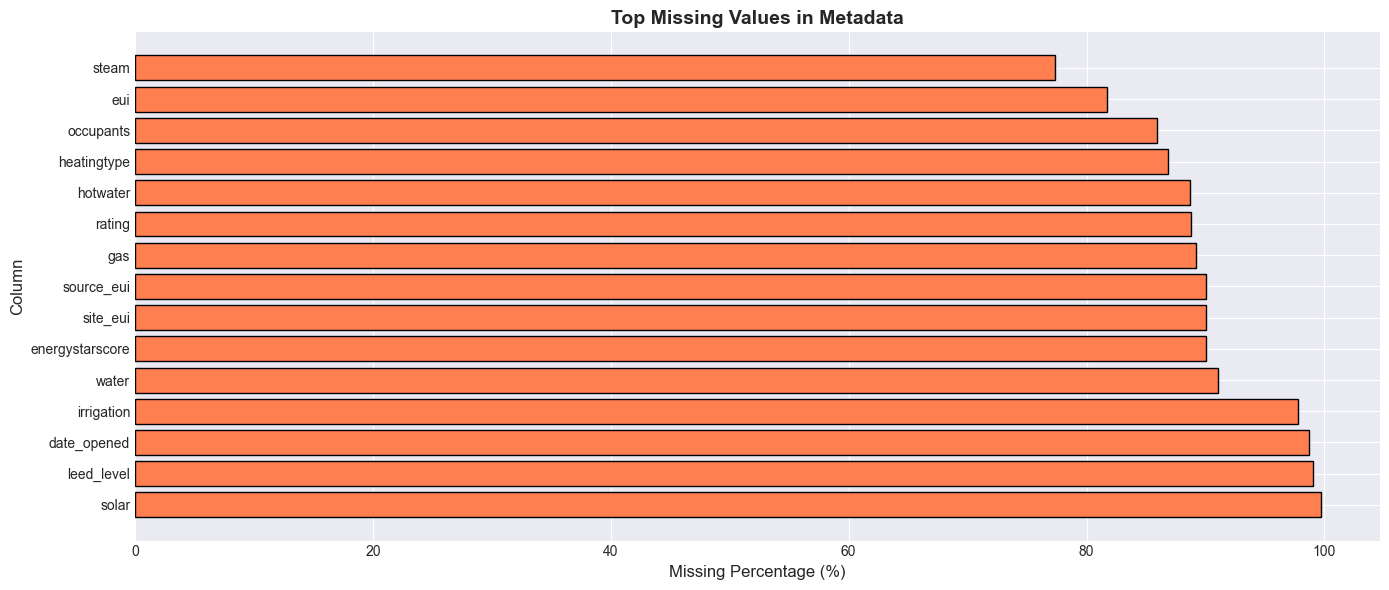

In [5]:
# Missing values in metadata
print("=" * 70)
print("MISSING VALUES IN METADATA")
print("=" * 70)

missing_meta = pd.DataFrame({
    'Column': metadata.columns,
    'Missing': metadata.isnull().sum(),
    'Percentage': (metadata.isnull().sum() / len(metadata) * 100).round(2)
}).sort_values('Missing', ascending=False)

print(missing_meta[missing_meta['Missing'] > 0].to_string(index=False))

# Visualize
if missing_meta['Missing'].sum() > 0:
    plt.figure(figsize=(14, 6))
    top_missing = missing_meta[missing_meta['Missing'] > 0].head(15)
    plt.barh(top_missing['Column'], top_missing['Percentage'], color='coral', edgecolor='black')
    plt.xlabel('Missing Percentage (%)', fontsize=12)
    plt.ylabel('Column', fontsize=12)
    plt.title('Top Missing Values in Metadata', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

BUILDING TYPES ANALYSIS

Number of building types: 16

Top 10 building types:
primaryspaceusage
Education                        617
Office                           307
Entertainment/public assembly    204
Lodging/residential              168
Public services                  166
Other                             29
Healthcare                        29
Parking                           24
Warehouse/storage                 15
Manufacturing/industrial          13
Name: count, dtype: int64


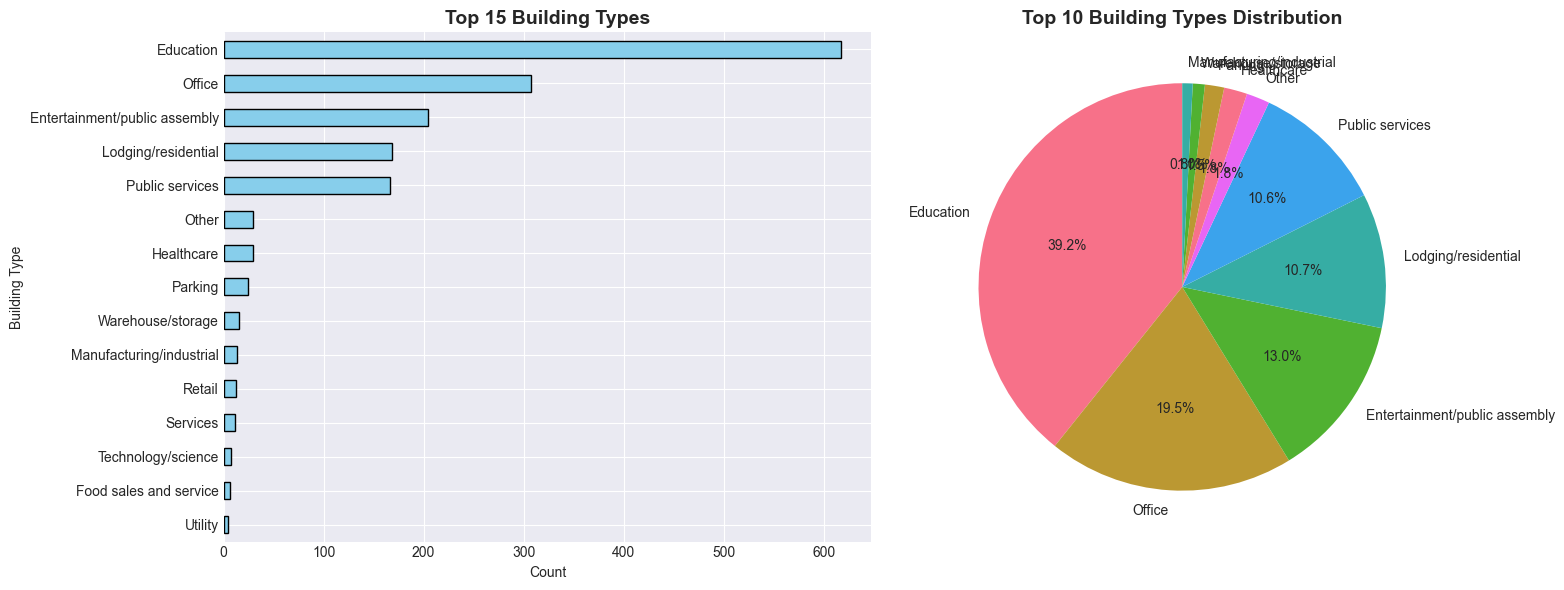

In [6]:
# Building types distribution
print("=" * 70)
print("BUILDING TYPES ANALYSIS")
print("=" * 70)

if 'primaryspaceusage' in metadata.columns:
    building_types = metadata['primaryspaceusage'].value_counts()
    print(f"\nNumber of building types: {len(building_types)}")
    print(f"\nTop 10 building types:")
    print(building_types.head(10))
    
    # Visualize
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Top 15 building types
    building_types.head(15).plot(kind='barh', ax=ax1, color='skyblue', edgecolor='black')
    ax1.set_title('Top 15 Building Types', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Count')
    ax1.set_ylabel('Building Type')
    ax1.invert_yaxis()
    
    # Pie chart of top 10
    building_types.head(10).plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90)
    ax2.set_title('Top 10 Building Types Distribution', fontsize=14, fontweight='bold')
    ax2.set_ylabel('')
    
    plt.tight_layout()
    plt.show()

SITES ANALYSIS

Number of sites: 19

Buildings per site:
site_id
Rat         305
Hog         163
Lamb        147
Fox         137
Panther     136
Cockatoo    124
Bull        124
Eagle       106
Bear         92
Gator        74
Robin        52
Peacock      47
Bobcat       36
Wolf         36
Swan         21
Moose        15
Shrew         9
Mouse         7
Crow          5
Name: count, dtype: int64


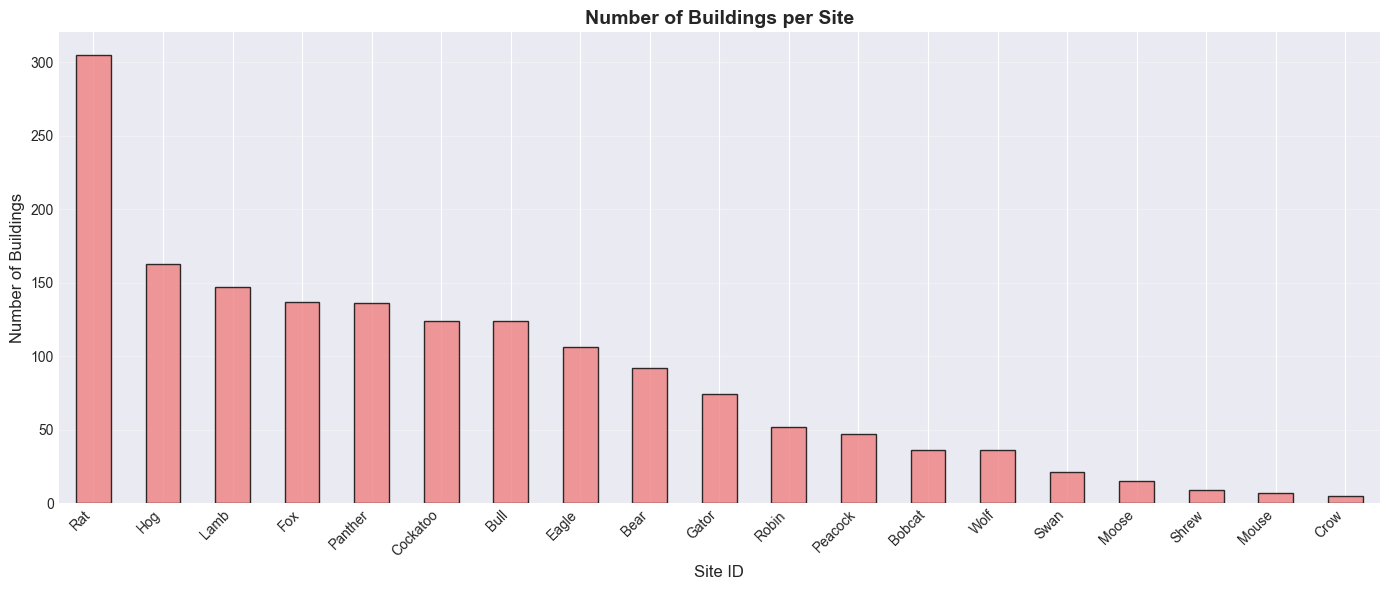

In [7]:
# Sites analysis
print("=" * 70)
print("SITES ANALYSIS")
print("=" * 70)

if 'site_id' in metadata.columns:
    site_counts = metadata['site_id'].value_counts()
    print(f"\nNumber of sites: {len(site_counts)}")
    print(f"\nBuildings per site:")
    print(site_counts)
    
    # Visualize
    plt.figure(figsize=(14, 6))
    site_counts.plot(kind='bar', color='lightcoral', edgecolor='black', alpha=0.8)
    plt.title('Number of Buildings per Site', fontsize=14, fontweight='bold')
    plt.xlabel('Site ID', fontsize=12)
    plt.ylabel('Number of Buildings', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

BUILDING SIZE DISTRIBUTION

Buildings with size data: 1636

Size statistics (sqm):
count    1636.00
mean     8224.03
std     10050.12
min        26.30
25%      1936.92
50%      5074.40
75%     10360.67
max     81290.10
Name: sqm, dtype: float64


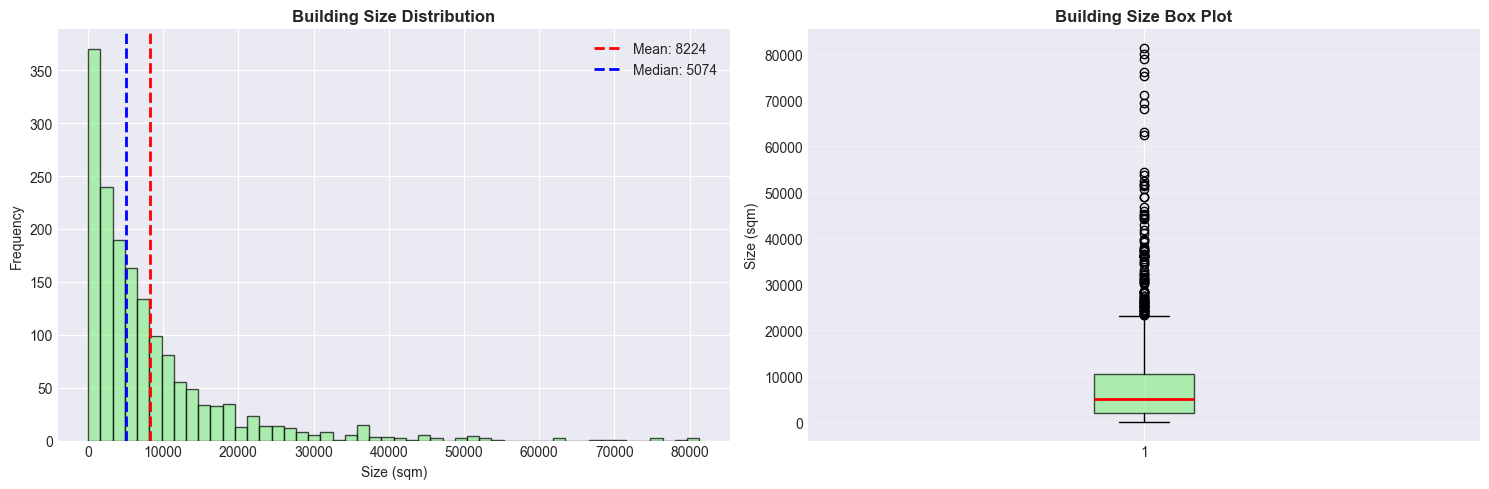

In [8]:
# Building size analysis
print("=" * 70)
print("BUILDING SIZE DISTRIBUTION")
print("=" * 70)

if 'sqm' in metadata.columns:
    sqm_data = metadata['sqm'].dropna()
    
    print(f"\nBuildings with size data: {len(sqm_data)}")
    print(f"\nSize statistics (sqm):")
    print(sqm_data.describe())
    
    # Visualize
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histogram
    ax1.hist(sqm_data, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
    ax1.axvline(sqm_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {sqm_data.mean():.0f}')
    ax1.axvline(sqm_data.median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {sqm_data.median():.0f}')
    ax1.set_title('Building Size Distribution', fontweight='bold')
    ax1.set_xlabel('Size (sqm)')
    ax1.set_ylabel('Frequency')
    ax1.legend()
    
    # Box plot
    ax2.boxplot(sqm_data, vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightgreen', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
    ax2.set_title('Building Size Box Plot', fontweight='bold')
    ax2.set_ylabel('Size (sqm)')
    ax2.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

ENERGY METERS AVAILABILITY
Electricity: 1578 buildings (96.5%)
Gas: 177 buildings (10.8%)
Hotwater: 185 buildings (11.3%)
Chilledwater: 555 buildings (33.9%)
Steam: 370 buildings (22.6%)
Water: 146 buildings (8.9%)
Irrigation: 37 buildings (2.3%)
Solar: 5 buildings (0.3%)


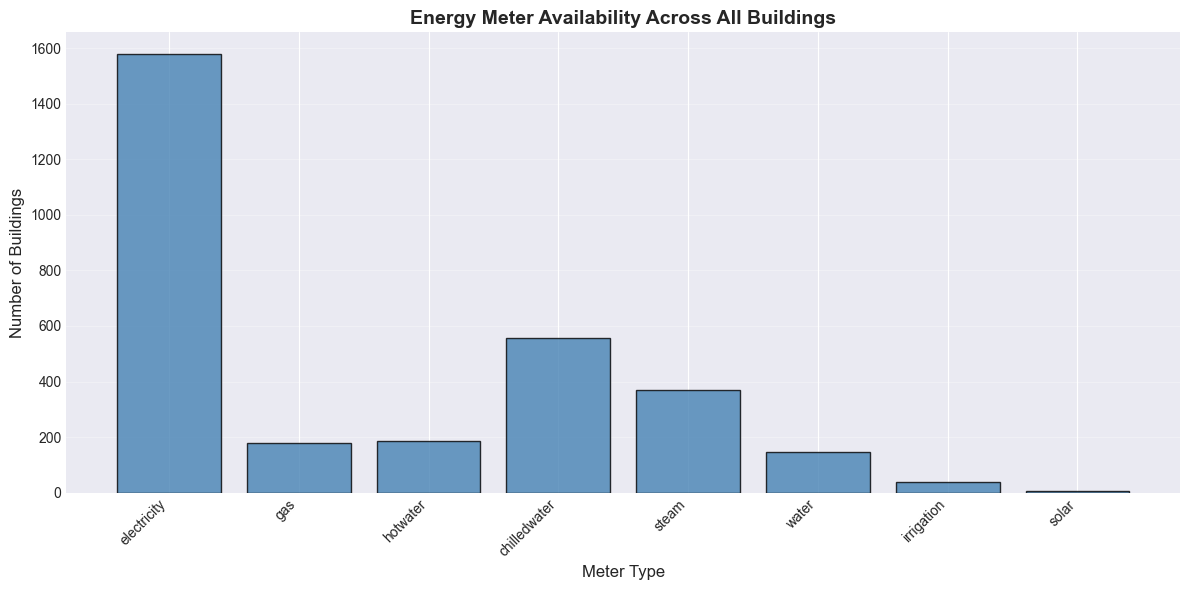

In [9]:
# Energy meters availability
print("=" * 70)
print("ENERGY METERS AVAILABILITY")
print("=" * 70)

meters = ['electricity', 'gas', 'hotwater', 'chilledwater', 'steam', 'water', 'irrigation', 'solar']
available_meters = [m for m in meters if m in metadata.columns]

meter_counts = {}
for meter in available_meters:
    count = (metadata[meter] == 'Yes').sum()
    meter_counts[meter] = count
    print(f"{meter.capitalize()}: {count} buildings ({count/len(metadata)*100:.1f}%)")

# Visualize
plt.figure(figsize=(12, 6))
plt.bar(meter_counts.keys(), meter_counts.values(), color='steelblue', edgecolor='black', alpha=0.8)
plt.title('Energy Meter Availability Across All Buildings', fontsize=14, fontweight='bold')
plt.xlabel('Meter Type', fontsize=12)
plt.ylabel('Number of Buildings', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Electricity Consumption Analysis

In [10]:
# Load electricity data (sample first to check size)
print("=" * 70)
print("LOADING ELECTRICITY DATA")
print("=" * 70)

electricity_path = os.path.join(METERS_PATH, 'electricity.csv')

# Load data
electricity = pd.read_csv(electricity_path, index_col=0, parse_dates=True)

print(f"\nElectricity data loaded")
print(f"Shape: {electricity.shape[0]:,} timestamps × {electricity.shape[1]} buildings")
print(f"Date range: {electricity.index.min()} to {electricity.index.max()}")
print(f"Total data points: {electricity.shape[0] * electricity.shape[1]:,}")
print(f"Memory usage: {electricity.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

LOADING ELECTRICITY DATA

Electricity data loaded
Shape: 17,544 timestamps × 1578 buildings
Date range: 2016-01-01 00:00:00 to 2017-12-31 23:00:00
Total data points: 27,684,432
Memory usage: 211.35 MB


ELECTRICITY DATA QUALITY

Missing data statistics:
  Mean: 4.74%
  Median: 0.15%
  Min: 0.00%
  Max: 100.00%

Data quality breakdown:
  Excellent (<5% missing): 1278 buildings
  Good (5-20% missing): 196 buildings
  Fair (20-50% missing): 40 buildings
  Poor (>50% missing): 64 buildings


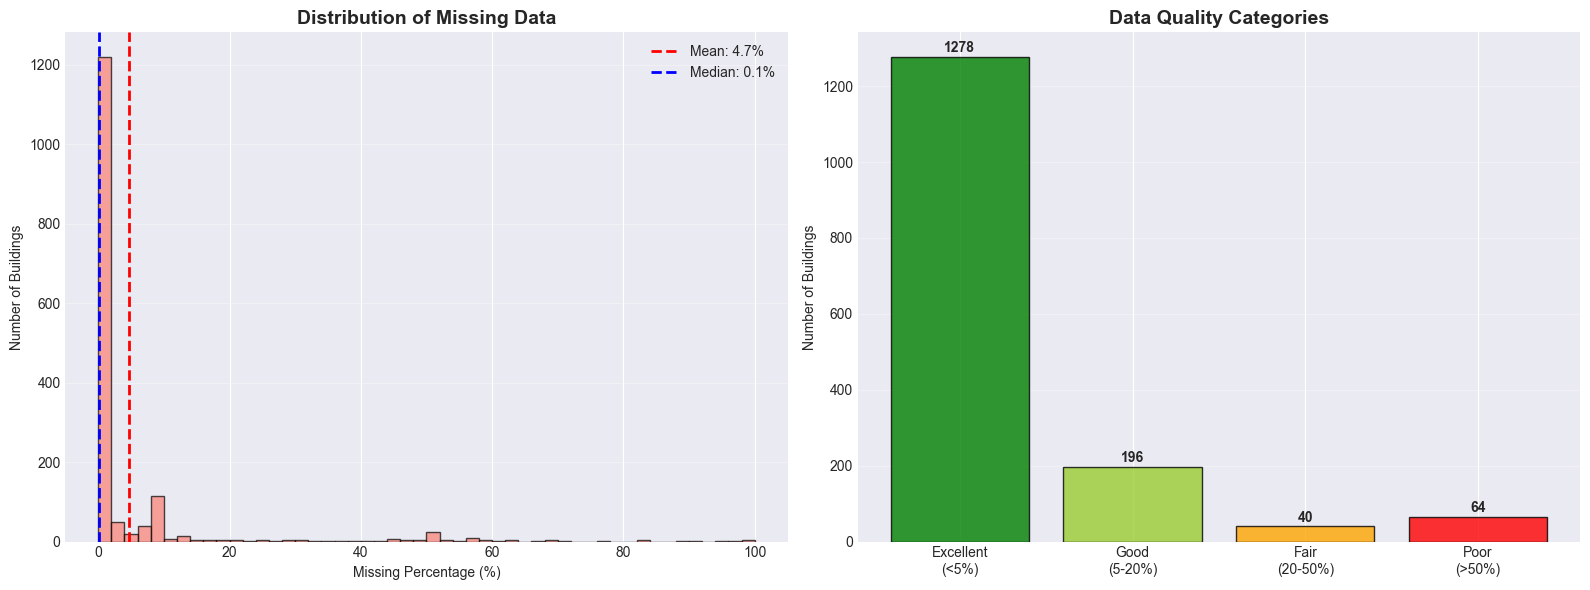

In [11]:
# Electricity data quality
print("=" * 70)
print("ELECTRICITY DATA QUALITY")
print("=" * 70)

# Missing values per building
missing_pct = (electricity.isna().sum() / len(electricity)) * 100

print(f"\nMissing data statistics:")
print(f"  Mean: {missing_pct.mean():.2f}%")
print(f"  Median: {missing_pct.median():.2f}%")
print(f"  Min: {missing_pct.min():.2f}%")
print(f"  Max: {missing_pct.max():.2f}%")

# Data quality categories
excellent = (missing_pct < 5).sum()
good = ((missing_pct >= 5) & (missing_pct < 20)).sum()
fair = ((missing_pct >= 20) & (missing_pct < 50)).sum()
poor = (missing_pct >= 50).sum()

print(f"\nData quality breakdown:")
print(f"  Excellent (<5% missing): {excellent} buildings")
print(f"  Good (5-20% missing): {good} buildings")
print(f"  Fair (20-50% missing): {fair} buildings")
print(f"  Poor (>50% missing): {poor} buildings")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of missing percentages
ax1.hist(missing_pct, bins=50, color='salmon', edgecolor='black', alpha=0.7)
ax1.axvline(missing_pct.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {missing_pct.mean():.1f}%')
ax1.axvline(missing_pct.median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {missing_pct.median():.1f}%')
ax1.set_title('Distribution of Missing Data', fontweight='bold', fontsize=14)
ax1.set_xlabel('Missing Percentage (%)')
ax1.set_ylabel('Number of Buildings')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Bar chart of quality categories
categories = ['Excellent\n(<5%)', 'Good\n(5-20%)', 'Fair\n(20-50%)', 'Poor\n(>50%)']
counts = [excellent, good, fair, poor]
colors_cat = ['green', 'yellowgreen', 'orange', 'red']
ax2.bar(categories, counts, color=colors_cat, edgecolor='black', alpha=0.8)
ax2.set_title('Data Quality Categories', fontweight='bold', fontsize=14)
ax2.set_ylabel('Number of Buildings')
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(counts):
    ax2.text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [12]:
# Top buildings by data quality
print("=" * 70)
print("BEST QUALITY BUILDINGS FOR ANALYSIS")
print("=" * 70)

# Get buildings with <20% missing
good_buildings = missing_pct[missing_pct < 20].sort_values()

print(f"\nBuildings with <20% missing data: {len(good_buildings)}")
print(f"\nTop 20 buildings (by data quality):")
print(good_buildings.head(20))

BEST QUALITY BUILDINGS FOR ANALYSIS

Buildings with <20% missing data: 1474

Top 20 buildings (by data quality):
Eagle_office_Patrice     0.00
Eagle_public_Minnie      0.00
Eagle_office_Remedios    0.00
Hog_food_Morgan          0.00
Hog_education_Madge      0.00
Hog_office_Guadalupe     0.00
Shrew_office_Kenneth     0.00
Shrew_office_Lin         0.00
Shrew_office_Doris       0.00
Shrew_office_Doug        0.00
Shrew_office_Ila         0.00
Eagle_education_Shana    0.00
Eagle_assembly_Margret   0.00
Eagle_education_Paul     0.00
Mouse_lodging_Vicente    0.00
Eagle_health_Vincenza    0.00
Lamb_education_Bert      0.00
Lamb_education_Luz       0.00
Lamb_education_Ira       0.00
Lamb_education_Debby     0.00
dtype: float64


In [13]:
# Electricity consumption statistics
print("=" * 70)
print("ELECTRICITY CONSUMPTION STATISTICS")
print("=" * 70)

# Overall statistics
print(f"\nOverall consumption statistics (kWh):")
print(electricity.describe())

# Mean consumption per building
mean_consumption = electricity.mean().sort_values(ascending=False)

print(f"\nTop 10 consumers (mean kWh):")
print(mean_consumption.head(10))

print(f"\nLowest 10 consumers (mean kWh):")
print(mean_consumption.tail(10))

ELECTRICITY CONSUMPTION STATISTICS

Overall consumption statistics (kWh):
       Panther_parking_Lorriane  Panther_lodging_Cora  Panther_office_Hannah  \
count                  17533.00              17533.00               17532.00   
mean                       8.66                109.33                   5.40   
std                        4.90                 56.50                   4.22   
min                        0.00                  0.00                   0.00   
25%                        6.66                108.27                   2.68   
50%                        9.60                126.62                   4.76   
75%                       12.66                145.28                   7.95   
max                       25.50                285.45                  27.77   

       Panther_lodging_Hattie  Panther_education_Teofila  \
count                17532.00                   17533.00   
mean                   113.52                     126.33   
std                     6

CONSUMPTION PATTERNS VISUALIZATION


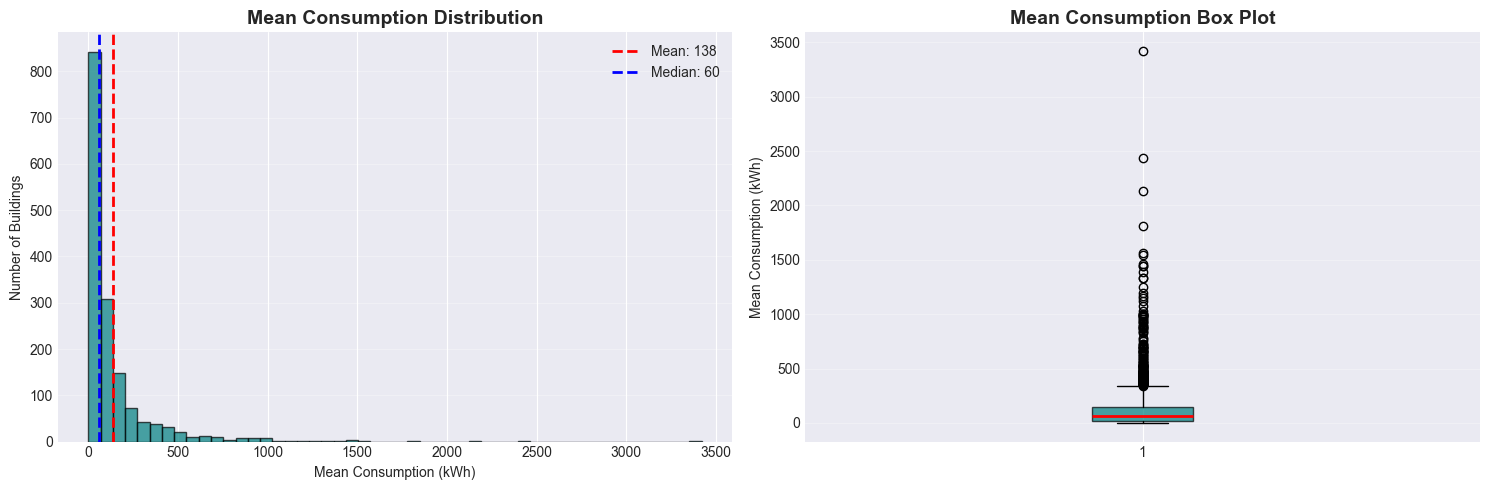

In [14]:
# Visualize consumption distribution
print("=" * 70)
print("CONSUMPTION PATTERNS VISUALIZATION")
print("=" * 70)

# Mean consumption per building
mean_by_building = electricity.mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Histogram of mean consumption
ax1.hist(mean_by_building.dropna(), bins=50, color='teal', edgecolor='black', alpha=0.7)
ax1.axvline(mean_by_building.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_by_building.mean():.0f}')
ax1.axvline(mean_by_building.median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {mean_by_building.median():.0f}')
ax1.set_title('Mean Consumption Distribution', fontweight='bold', fontsize=14)
ax1.set_xlabel('Mean Consumption (kWh)')
ax1.set_ylabel('Number of Buildings')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Box plot
ax2.boxplot(mean_by_building.dropna(), vert=True, patch_artist=True,
            boxprops=dict(facecolor='teal', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
ax2.set_title('Mean Consumption Box Plot', fontweight='bold', fontsize=14)
ax2.set_ylabel('Mean Consumption (kWh)')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

SAMPLE BUILDING TIME SERIES

Sampling buildings: ['Eagle_office_Patrice', 'Eagle_public_Minnie', 'Eagle_office_Remedios', 'Hog_food_Morgan', 'Hog_education_Madge']


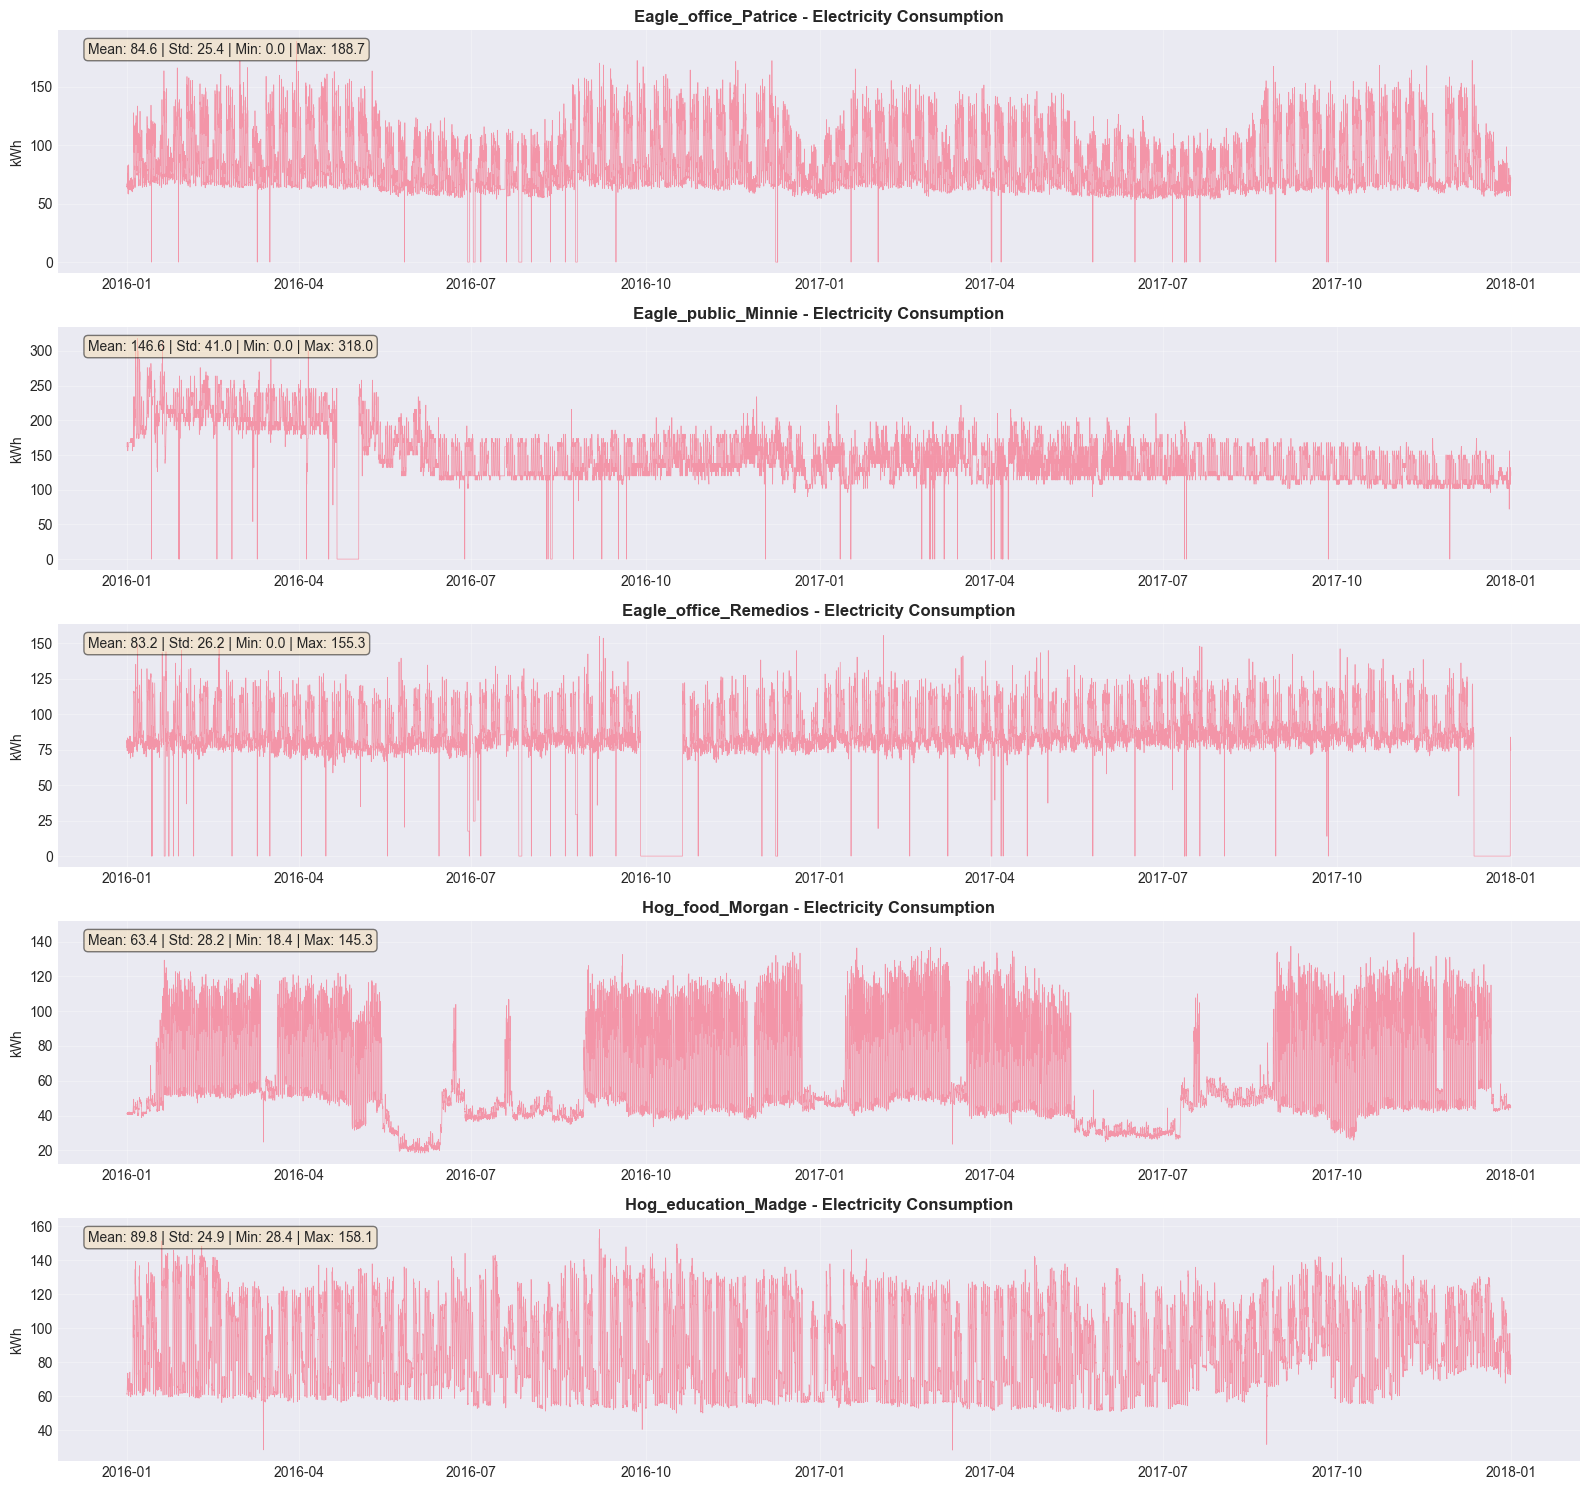

In [15]:
# Sample building time series
print("=" * 70)
print("SAMPLE BUILDING TIME SERIES")
print("=" * 70)

# Select 5 buildings with good data quality
sample_buildings = good_buildings.head(5).index.tolist()

print(f"\nSampling buildings: {sample_buildings}")

# Plot time series
fig, axes = plt.subplots(len(sample_buildings), 1, figsize=(16, 3*len(sample_buildings)))
if len(sample_buildings) == 1:
    axes = [axes]

for idx, building in enumerate(sample_buildings):
    data = electricity[building].dropna()
    axes[idx].plot(data.index, data.values, linewidth=0.5, alpha=0.7)
    axes[idx].set_title(f'{building} - Electricity Consumption', fontweight='bold')
    axes[idx].set_ylabel('kWh')
    axes[idx].grid(alpha=0.3)
    
    # Add statistics
    stats_text = f"Mean: {data.mean():.1f} | Std: {data.std():.1f} | Min: {data.min():.1f} | Max: {data.max():.1f}"
    axes[idx].text(0.02, 0.95, stats_text, transform=axes[idx].transAxes,
                  bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                  verticalalignment='top')

plt.tight_layout()
plt.show()

## 4. Temporal Patterns Analysis

TEMPORAL PATTERNS - HOURLY, DAILY, MONTHLY


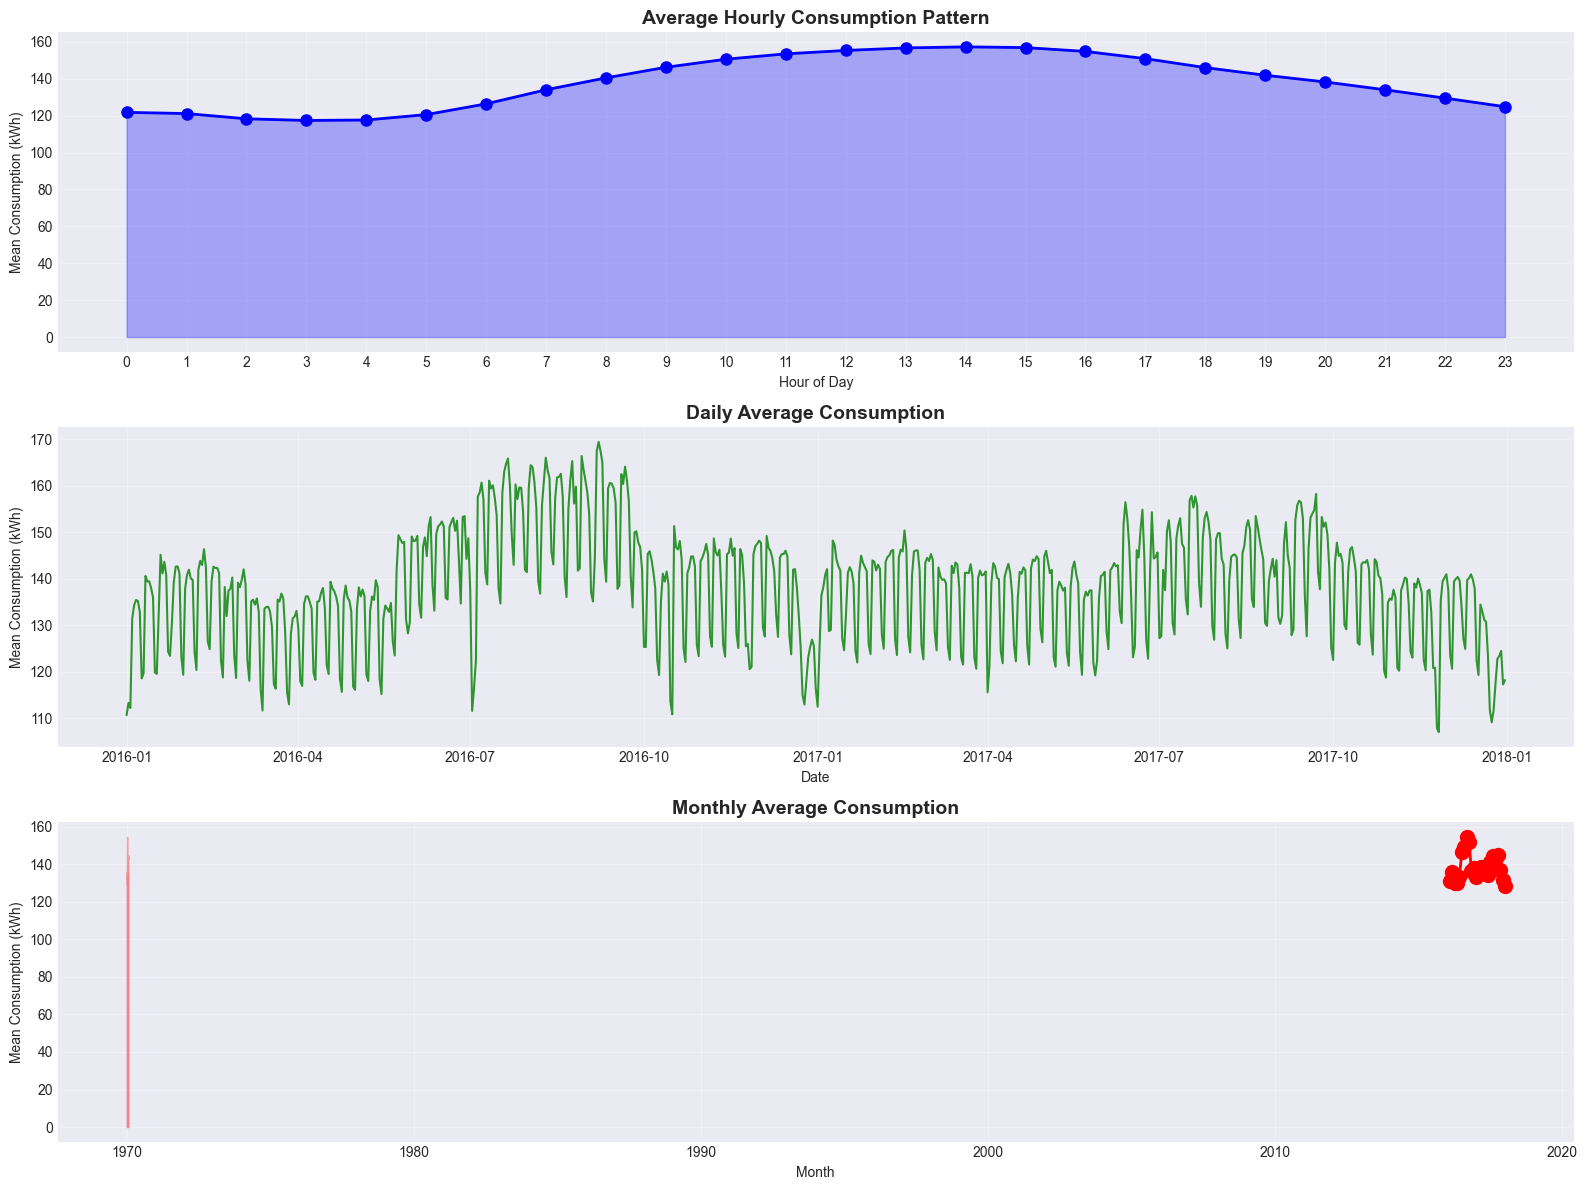


Peak hour: 14:00
Lowest hour: 3:00
Peak month: August 2016
Lowest month: December 2017


In [16]:
# Overall temporal patterns
print("=" * 70)
print("TEMPORAL PATTERNS - HOURLY, DAILY, MONTHLY")
print("=" * 70)

# Calculate mean consumption over time
hourly_mean = electricity.groupby(electricity.index.hour).mean().mean(axis=1)
daily_mean = electricity.resample('D').mean().mean(axis=1)
monthly_mean = electricity.resample('M').mean().mean(axis=1)

# Create temporal plots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 12))

# Hourly pattern
ax1.plot(hourly_mean.index, hourly_mean.values, marker='o', linewidth=2, markersize=8, color='blue')
ax1.set_title('Average Hourly Consumption Pattern', fontweight='bold', fontsize=14)
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Mean Consumption (kWh)')
ax1.set_xticks(range(24))
ax1.grid(alpha=0.3)
ax1.fill_between(hourly_mean.index, hourly_mean.values, alpha=0.3, color='blue')

# Daily pattern
ax2.plot(daily_mean.index, daily_mean.values, linewidth=1.5, color='green', alpha=0.8)
ax2.set_title('Daily Average Consumption', fontweight='bold', fontsize=14)
ax2.set_xlabel('Date')
ax2.set_ylabel('Mean Consumption (kWh)')
ax2.grid(alpha=0.3)

# Monthly pattern
ax3.plot(monthly_mean.index, monthly_mean.values, marker='o', linewidth=2, markersize=10, color='red')
ax3.set_title('Monthly Average Consumption', fontweight='bold', fontsize=14)
ax3.set_xlabel('Month')
ax3.set_ylabel('Mean Consumption (kWh)')
ax3.grid(alpha=0.3)
ax3.fill_between(range(len(monthly_mean)), monthly_mean.values, alpha=0.3, color='red')

plt.tight_layout()
plt.show()

print(f"\nPeak hour: {hourly_mean.idxmax()}:00")
print(f"Lowest hour: {hourly_mean.idxmin()}:00")
print(f"Peak month: {monthly_mean.idxmax().strftime('%B %Y')}")
print(f"Lowest month: {monthly_mean.idxmin().strftime('%B %Y')}")

DAY OF WEEK PATTERNS

Mean consumption by day of week:
  Monday: 141.73 kWh
  Tuesday: 144.50 kWh
  Wednesday: 144.60 kWh
  Thursday: 143.99 kWh
  Friday: 141.48 kWh
  Saturday: 126.64 kWh
  Sunday: 124.19 kWh


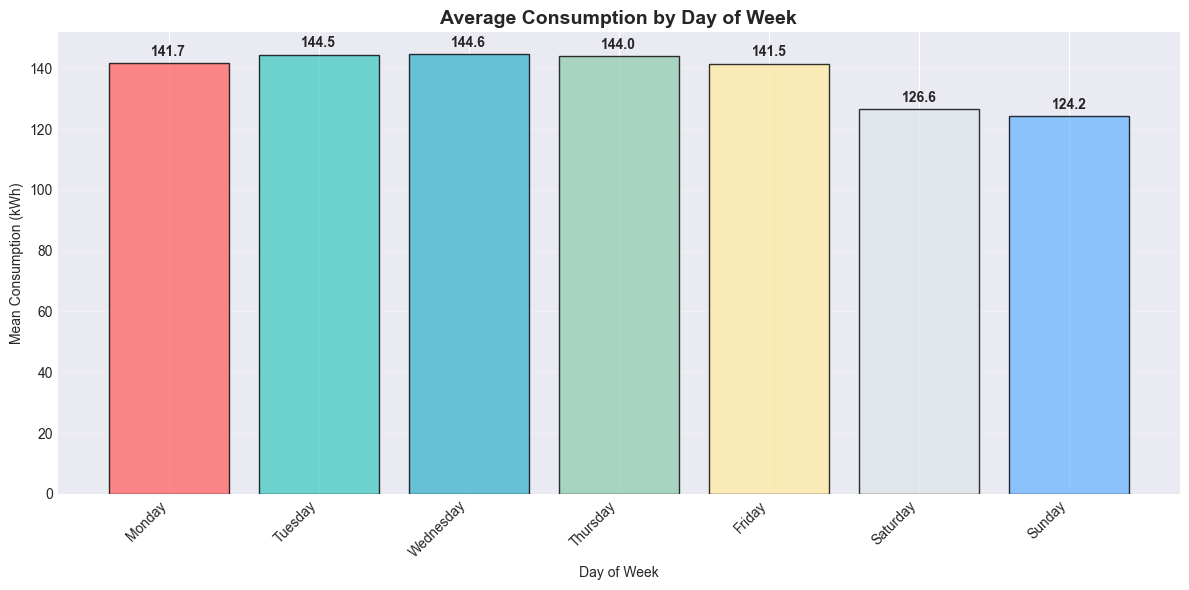

In [17]:
# Day of week patterns
print("=" * 70)
print("DAY OF WEEK PATTERNS")
print("=" * 70)

# Calculate mean by day of week
dow_mean = electricity.groupby(electricity.index.dayofweek).mean().mean(axis=1)
dow_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

print(f"\nMean consumption by day of week:")
for idx, day in enumerate(dow_names):
    print(f"  {day}: {dow_mean[idx]:.2f} kWh")

# Visualize
plt.figure(figsize=(12, 6))
plt.bar(dow_names, dow_mean.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DFE6E9', '#74B9FF'],
        edgecolor='black', alpha=0.8)
plt.title('Average Consumption by Day of Week', fontweight='bold', fontsize=14)
plt.xlabel('Day of Week')
plt.ylabel('Mean Consumption (kWh)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(dow_mean.values):
    plt.text(i, v + dow_mean.max()*0.01, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Weather Data Analysis

In [18]:
# Load weather data
print("=" * 70)
print("LOADING WEATHER DATA")
print("=" * 70)

weather = pd.read_csv(WEATHER_PATH)

print(f"\nWeather data loaded")
print(f"Shape: {weather.shape}")
print(f"\nColumns: {list(weather.columns)}")
print(f"\nFirst few rows:")
weather.head(10)

LOADING WEATHER DATA

Weather data loaded
Shape: (331166, 10)

Columns: ['timestamp', 'site_id', 'airTemperature', 'cloudCoverage', 'dewTemperature', 'precipDepth1HR', 'precipDepth6HR', 'seaLvlPressure', 'windDirection', 'windSpeed']

First few rows:


,timestamp,site_id,airTemperature,cloudCoverage,dewTemperature,precipDepth1HR,precipDepth6HR,seaLvlPressure,windDirection,windSpeed
0,2016-01-01 00:00:00,Panther,19.40,NaN,19.40,0.00,NaN,NaN,0.00,0.00
1,2016-01-01 01:00:00,Panther,21.10,6.00,21.10,-1.00,NaN,1019.40,0.00,0.00
2,2016-01-01 02:00:00,Panther,21.10,NaN,21.10,0.00,NaN,1018.80,210.00,1.50
3,2016-01-01 03:00:00,Panther,20.60,NaN,20.00,0.00,NaN,1018.10,0.00,0.00
4,2016-01-01 04:00:00,Panther,21.10,NaN,20.60,0.00,NaN,1019.00,290.00,1.50
5,2016-01-01 05:00:00,Panther,21.10,NaN,20.60,-1.00,NaN,1018.40,0.00,0.00
6,2016-01-01 06:00:00,Panther,20.60,NaN,20.00,0.00,NaN,1018.90,0.00,0.00
7,2016-01-01 07:00:00,Panther,18.90,6.00,18.90,0.00,0.00,1019.20,210.00,1.50
8,2016-01-01 08:00:00,Panther,20.00,NaN,20.00,0.00,NaN,1019.60,0.00,0.00
9,2016-01-01 09:00:00,Panther,21.70,NaN,21.10,0.00,NaN,1020.10,0.00,0.00


In [19]:
# Weather data summary
print("=" * 70)
print("WEATHER DATA SUMMARY")
print("=" * 70)

print(f"\nWeather observations: {len(weather):,}")
print(f"\nSites with weather data:")
if 'site_id' in weather.columns:
    print(weather['site_id'].value_counts())

print(f"\nWeather statistics:")
weather.describe()

WEATHER DATA SUMMARY

Weather observations: 331,166

Sites with weather data:
site_id
Panther     17544
Gator       17544
Fox         17543
Hog         17542
Bear        17542
Rat         17539
Peacock     17539
Eagle       17536
Swan        17535
Bull        17529
Bobcat      17525
Robin       17516
Shrew       17516
Mouse       17516
Wolf        17505
Lamb        17500
Cockatoo    16975
Moose       16860
Crow        16860
Name: count, dtype: int64

Weather statistics:


,airTemperature,cloudCoverage,dewTemperature,precipDepth1HR,precipDepth6HR,seaLvlPressure,windDirection,windSpeed
count,331038.00,160179.00,330838.00,197980.00,18162.00,309542.00,318161.00,330592.00
mean,14.24,1.92,7.65,0.96,13.54,1016.06,184.39,3.57
std,9.99,2.55,9.20,8.27,43.80,8.05,111.57,2.34
min,-28.90,0.00,-35.00,-1.00,-1.00,968.20,0.00,0.00
25%,7.80,0.00,1.80,0.00,0.00,1011.60,90.00,2.10
50%,14.40,0.00,8.50,0.00,0.00,1016.20,200.00,3.10
75%,21.10,4.00,13.90,0.00,5.00,1020.90,280.00,5.00
max,48.30,9.00,26.70,597.00,770.00,1050.10,360.00,24.20


WEATHER VARIABLES DISTRIBUTION

Weather variables: ['airTemperature', 'cloudCoverage', 'dewTemperature', 'precipDepth1HR', 'precipDepth6HR', 'seaLvlPressure', 'windDirection', 'windSpeed']


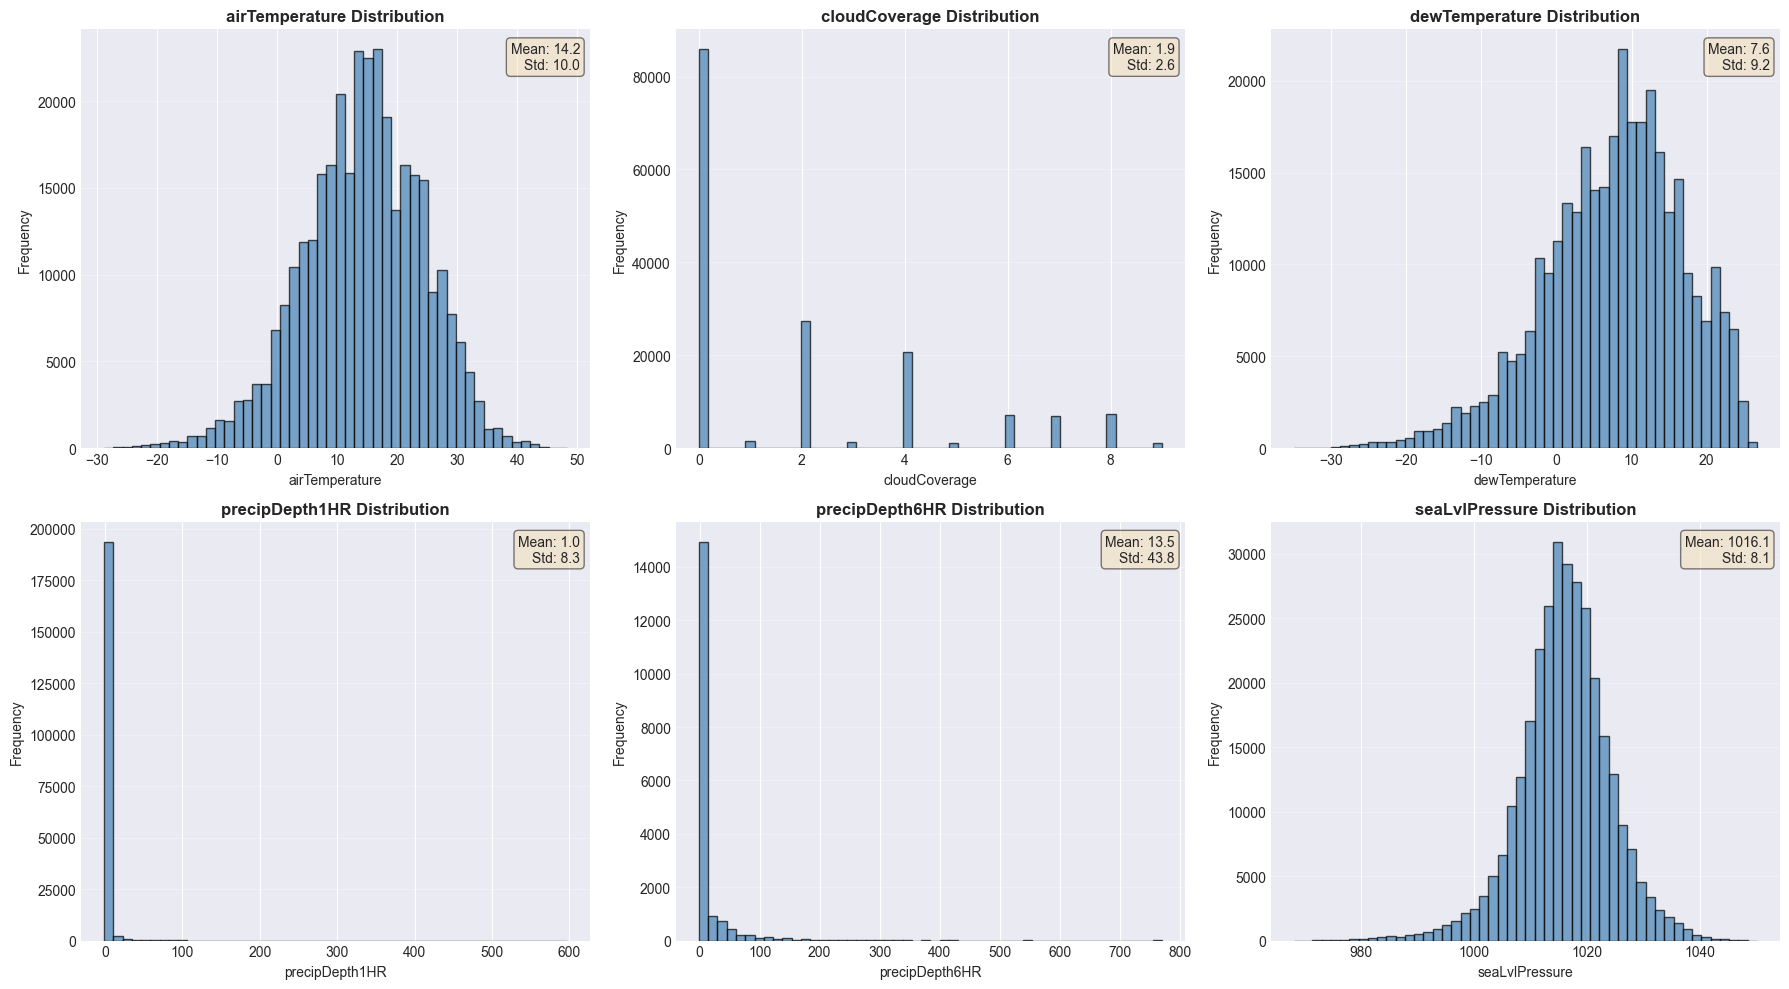

In [20]:
# Weather variables analysis
print("=" * 70)
print("WEATHER VARIABLES DISTRIBUTION")
print("=" * 70)

# Select numeric weather columns
weather_vars = weather.select_dtypes(include=[np.number]).columns.tolist()
if 'site_id' in weather_vars:
    weather_vars.remove('site_id')

print(f"\nWeather variables: {weather_vars}")

# Visualize distributions
n_vars = len(weather_vars[:6])  # Show first 6 variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, var in enumerate(weather_vars[:6]):
    data = weather[var].dropna()
    if len(data) > 0:
        axes[idx].hist(data, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{var} Distribution', fontweight='bold')
        axes[idx].set_xlabel(var)
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(axis='y', alpha=0.3)
        
        # Add statistics
        stats_text = f"Mean: {data.mean():.1f}\nStd: {data.std():.1f}"
        axes[idx].text(0.98, 0.97, stats_text, transform=axes[idx].transAxes,
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                      verticalalignment='top', horizontalalignment='right')

plt.tight_layout()
plt.show()

## 6. Energy-Weather Correlation Analysis

In [21]:
# Prepare data for correlation analysis
print("=" * 70)
print("ENERGY-WEATHER CORRELATION ANALYSIS")
print("=" * 70)

print("\n⏳ Preparing data for correlation analysis...")
print("This analysis helps identify weather impacts on energy consumption")

ENERGY-WEATHER CORRELATION ANALYSIS

⏳ Preparing data for correlation analysis...
This analysis helps identify weather impacts on energy consumption


## 7. Multi-Meter Comparison

MULTI-METER COMPARISON

Available meter types: ['chilledwater.csv', 'electricity.csv', 'gas.csv', 'hotwater.csv', 'irrigation.csv', 'solar.csv', 'steam.csv', 'water.csv']

Chilledwater:
  Buildings: 555
  Timestamps: 17,544

Electricity:
  Buildings: 1578
  Timestamps: 17,544

Gas:
  Buildings: 177
  Timestamps: 17,544

Hotwater:
  Buildings: 185
  Timestamps: 17,544

Irrigation:
  Buildings: 37
  Timestamps: 17,544

Solar:
  Buildings: 5
  Timestamps: 17,544

Steam:
  Buildings: 370
  Timestamps: 17,544

Water:
  Buildings: 146
  Timestamps: 17,544


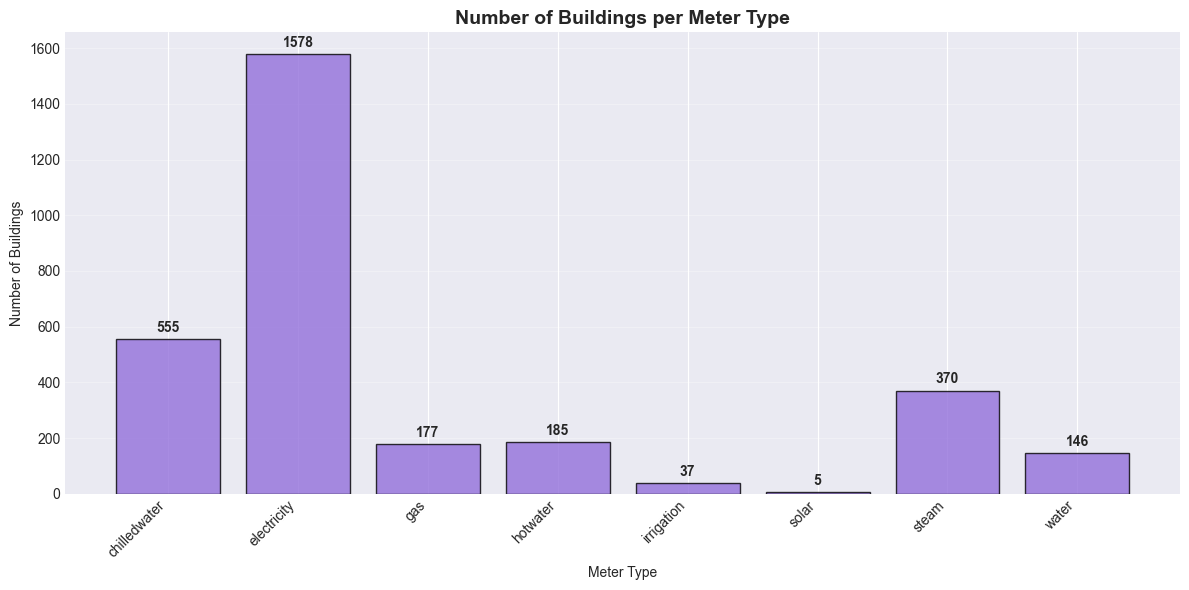

In [26]:
# Compare different meter types
print("=" * 70)
print("MULTI-METER COMPARISON")
print("=" * 70)

# List available meter files
meter_files = [f for f in os.listdir(METERS_PATH) if f.endswith('.csv')]
print(f"\nAvailable meter types: {meter_files}")

meter_summary = {}
for meter_file in meter_files:
    meter_name = meter_file.replace('.csv', '')
    meter_path = os.path.join(METERS_PATH, meter_file)
    
    # Load just to get dimensions
    meter_data = pd.read_csv(meter_path, index_col=0, nrows=5)
    
    # Get full row count
    with open(meter_path, 'r') as f:
        row_count = sum(1 for line in f) - 1  # Subtract header
    
    meter_summary[meter_name] = {
        'buildings': len(meter_data.columns),
        'timestamps': row_count
    }
    print(f"\n{meter_name.capitalize()}:")
    print(f"  Buildings: {meter_summary[meter_name]['buildings']}")
    print(f"  Timestamps: {meter_summary[meter_name]['timestamps']:,}")

# Visualize meter coverage
meter_buildings = [meter_summary[m]['buildings'] for m in meter_summary.keys()]

plt.figure(figsize=(12, 6))
plt.bar(meter_summary.keys(), meter_buildings, color='mediumpurple', edgecolor='black', alpha=0.8)
plt.title('Number of Buildings per Meter Type', fontweight='bold', fontsize=14)
plt.xlabel('Meter Type')
plt.ylabel('Number of Buildings')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(meter_buildings):
    plt.text(i, v + max(meter_buildings)*0.01, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 8. Transfer Learning Candidate Selection

In [27]:
# Identify best building pairs for transfer learning
print("=" * 70)
print("TRANSFER LEARNING CANDIDATE ANALYSIS")
print("=" * 70)

# Get buildings with good data quality (<20% missing)
good_quality_buildings = missing_pct[missing_pct < 20].index.tolist()

print(f"\nBuildings with good data quality (<20% missing): {len(good_quality_buildings)}")

# Match with metadata
if 'building_id' in metadata.columns:
    good_buildings_meta = metadata[metadata['building_id'].isin(good_quality_buildings)]
    
    print(f"\nBuilding types in good quality subset:")
    if 'primaryspaceusage' in good_buildings_meta.columns:
        type_counts = good_buildings_meta['primaryspaceusage'].value_counts()
        print(type_counts)
        
        # Identify transfer learning opportunities
        print(f"\nTRANSFER LEARNING OPPORTUNITIES:")
        
        # Same-type transfer (buildings of same type)
        same_type = type_counts[type_counts >= 2]
        if len(same_type) > 0:
            print(f"\n  Same-Type Transfer (within building type):")
            for building_type, count in same_type.items():
                buildings = good_buildings_meta[good_buildings_meta['primaryspaceusage'] == building_type]['building_id'].tolist()
                print(f"     {building_type}: {count} buildings")
                print(f"       Buildings: {buildings[:5]}" + ("..." if len(buildings) > 5 else ""))
        
        # Cross-type transfer
        if len(type_counts) > 1:
            print(f"\n  Cross-Type Transfer (between building types):")
            print(f"     {len(type_counts)} different building types available")
            print(f"     Most common: {type_counts.index[0]} ({type_counts.iloc[0]} buildings)")
            print(f"     Can transfer from {type_counts.index[0]} to other types")
    
    # Site-based transfer
    if 'site_id' in good_buildings_meta.columns:
        site_counts = good_buildings_meta['site_id'].value_counts()
        same_site = site_counts[site_counts >= 2]
        
        if len(same_site) > 0:
            print(f"\n  Same-Site Transfer (shared climate):")
            for site, count in same_site.items():
                buildings = good_buildings_meta[good_buildings_meta['site_id'] == site]['building_id'].tolist()
                print(f"     Site {site}: {count} buildings")
                print(f"       Buildings: {buildings[:5]}" + ("..." if len(buildings) > 5 else ""))

TRANSFER LEARNING CANDIDATE ANALYSIS

Buildings with good data quality (<20% missing): 1474

Building types in good quality subset:
primaryspaceusage
Education                        561
Office                           282
Entertainment/public assembly    193
Public services                  154
Lodging/residential              147
Healthcare                        26
Other                             25
Parking                           22
Warehouse/storage                 14
Retail                            11
Manufacturing/industrial          11
Services                           9
Technology/science                 6
Food sales and service             6
Utility                            4
Religious worship                  3
Name: count, dtype: int64

TRANSFER LEARNING OPPORTUNITIES:

  Same-Type Transfer (within building type):
     Education: 561 buildings
       Buildings: ['Panther_education_Rosalie', 'Panther_education_Misty', 'Panther_education_Mattie', 'Panther_education_

## 9. Data Quality Recommendations

In [24]:
# Provide recommendations
print("=" * 70)
print("DATA QUALITY RECOMMENDATIONS")
print("=" * 70)

print(f"\nDATASET OVERVIEW:")
print(f"   Total buildings in metadata: {len(metadata)}")
print(f"   Buildings with electricity data: {electricity.shape[1]}")
print(f"   Buildings with good quality (<20% missing): {len(good_quality_buildings)}")

print(f"\nRECOMMENDATIONS:")
print(f"\n1. DATA SELECTION:")
print(f"   - Focus on {len(good_quality_buildings)} buildings with <20% missing data")
print(f"   - Prioritize buildings with complete metadata (size, type, year)")
print(f"   - Consider buildings from multiple sites for weather diversity")

print(f"\n2. DATA PREPROCESSING:")
print(f"   - Handle missing values (interpolation for short gaps <3 hours)")
print(f"   - Remove outliers (values >10x the 95th percentile)")
print(f"   - Normalize consumption by building size if available")
print(f"   - Address extended zero periods (>72 hours)")

print(f"\n3. FEATURE ENGINEERING:")
print(f"   - Add temporal features (hour, day of week, month)")
print(f"   - Include cyclical encoding for time (sin/cos transformations)")
print(f"   - Merge weather data by site and timestamp")
print(f"   - Create lag features for past consumption")

print(f"\n4. TRANSFER LEARNING STRATEGY:")
print(f"   - Start with same-type transfer (e.g., Education → Education)")
print(f"   - Test same-site transfer to leverage climate similarity")
print(f"   - Experiment with cross-type transfer for generalization")
print(f"   - Use buildings with most data as source models")

print(f"\n5. VALIDATION:")
print(f"   - Use temporal split (not random) to preserve time series structure")
print(f"   - Reserve recent data for testing")
print(f"   - Compare against baseline models trained from scratch")
print(f"   - Evaluate on multiple target buildings to assess generalization")

DATA QUALITY RECOMMENDATIONS

DATASET OVERVIEW:
   Total buildings in metadata: 1636
   Buildings with electricity data: 1578
   Buildings with good quality (<20% missing): 1474

RECOMMENDATIONS:

1. DATA SELECTION:
   - Focus on 1474 buildings with <20% missing data
   - Prioritize buildings with complete metadata (size, type, year)
   - Consider buildings from multiple sites for weather diversity

2. DATA PREPROCESSING:
   - Handle missing values (interpolation for short gaps <3 hours)
   - Remove outliers (values >10x the 95th percentile)
   - Normalize consumption by building size if available
   - Address extended zero periods (>72 hours)

3. FEATURE ENGINEERING:
   - Add temporal features (hour, day of week, month)
   - Include cyclical encoding for time (sin/cos transformations)
   - Merge weather data by site and timestamp
   - Create lag features for past consumption

4. TRANSFER LEARNING STRATEGY:
   - Start with same-type transfer (e.g., Education → Education)
   - Test same

## 10. Export Summary Report

In [25]:
# Create comprehensive summary report
print("=" * 70)
print("CREATING SUMMARY REPORT")
print("=" * 70)

summary = {
    'Analysis Date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'Total Buildings (Metadata)': len(metadata),
    'Buildings with Electricity': electricity.shape[1],
    'Electricity Timestamps': electricity.shape[0],
    'Date Range Start': str(electricity.index.min()),
    'Date Range End': str(electricity.index.max()),
    'Buildings Good Quality (<20% missing)': len(good_quality_buildings),
    'Buildings Excellent Quality (<5% missing)': excellent,
    'Mean Missing Percentage': f"{missing_pct.mean():.2f}%",
    'Building Types': metadata['primaryspaceusage'].nunique() if 'primaryspaceusage' in metadata.columns else 'N/A',
    'Sites': metadata['site_id'].nunique() if 'site_id' in metadata.columns else 'N/A',
    'Peak Hour': f"{hourly_mean.idxmax()}:00",
    'Lowest Hour': f"{hourly_mean.idxmin()}:00",
}

# Display summary
print("\nANALYSIS SUMMARY:")
for key, value in summary.items():
    print(f"   {key}: {value}")

# Save to CSV
summary_df = pd.DataFrame([summary])
report_path = '../results/raw_data_analysis_summary.csv'
os.makedirs('../results', exist_ok=True)
summary_df.to_csv(report_path, index=False)
print(f"\nSummary report saved to: {report_path}")

# Save good quality buildings list
good_buildings_df = pd.DataFrame({
    'building_id': good_quality_buildings,
    'missing_percentage': [missing_pct[b] for b in good_quality_buildings]
}).sort_values('missing_percentage')
good_buildings_path = '../results/good_quality_buildings.csv'
good_buildings_df.to_csv(good_buildings_path, index=False)
print(f"Good quality buildings list saved to: {good_buildings_path}")

print("\n" + "=" * 70)
print("ANALYSIS COMPLETE!")
print("=" * 70)

CREATING SUMMARY REPORT

ANALYSIS SUMMARY:
   Analysis Date: 2026-01-02 09:01:43
   Total Buildings (Metadata): 1636
   Buildings with Electricity: 1578
   Electricity Timestamps: 17544
   Date Range Start: 2016-01-01 00:00:00
   Date Range End: 2017-12-31 23:00:00
   Buildings Good Quality (<20% missing): 1474
   Buildings Excellent Quality (<5% missing): 1278
   Mean Missing Percentage: 4.74%
   Building Types: 16
   Sites: 19
   Peak Hour: 14:00
   Lowest Hour: 3:00

Summary report saved to: ../results/raw_data_analysis_summary.csv
Good quality buildings list saved to: ../results/good_quality_buildings.csv

ANALYSIS COMPLETE!
